In [1]:
import PIL
import cv2
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras

In [4]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir=tf.keras.utils.get_file('flower_photos', origin=dataset_url, cache_dir='.',untar=True)

In [5]:
data_dir

'.\\datasets\\flower_photos'

In [6]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [13]:
from pathlib import Path
import os

print("Returned path:", data_dir)

# Convert to Path and list contents
data_dir_path = Path(data_dir)
print("Contents:", list(data_dir_path.iterdir()))


Returned path: datasets
Contents: [WindowsPath('datasets/.ipynb_checkpoints'), WindowsPath('datasets/0_img(NN).png'), WindowsPath('datasets/2_img(NN).jpeg'), WindowsPath('datasets/7_img(NN).png'), WindowsPath('datasets/chronic_kidney_disease_cleaned.csv'), WindowsPath('datasets/diabetes.csv'), WindowsPath('datasets/diabetes_cleaned.csv'), WindowsPath('datasets/diabetes_dataset.csv'), WindowsPath('datasets/flower_photos'), WindowsPath('datasets/flower_photos_archive'), WindowsPath('datasets/hypothyroid.csv'), WindowsPath('datasets/hypothyroid_cleaned.csv'), WindowsPath('datasets/SonarVsRock.csv'), WindowsPath('datasets/Telco-Customer-Churn.csv')]


In [10]:
from pathlib import Path
data_dir = Path("./datasets")
print(data_dir.exists())  # should be True


True


In [15]:
import shutil

# Remove folder if exists
shutil.rmtree(Path(data_dir) / "flower_photos", ignore_errors=True)

# Force download again
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file(
    'flower_photos',
    origin=dataset_url,
    cache_dir='./datasets',
    cache_subdir='',
    untar=True,
    force_download=True
)

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 25s 0us/step


In [30]:
print(data_dir)
print(list(data_dir.iterdir()))

datasets\flower_photos
[WindowsPath('datasets/flower_photos/flower_photos')]


In [25]:
image_paths = list((Path(data_dir) / "flower_photos").glob("*/*.jpg"))
print(f"Found {len(image_paths)} JPG images")


Found 3670 JPG images


In [7]:
list(data_dir.glob('*/*.jpg'))

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/102841525_bd6628ae3c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1031799732_e7f4008c03.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10391248763_1d16681106_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437754174_22ec990b77_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437770546_8bb6f7bdd3_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437929963_bc13eebe0c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466290366_cc72e33532.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466558316_a7198b87e2.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1

In [8]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

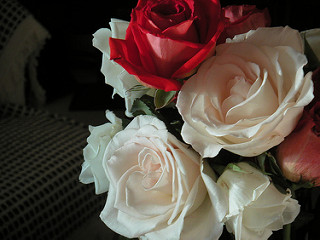

In [9]:
PIL.Image.open(str(roses[1]))

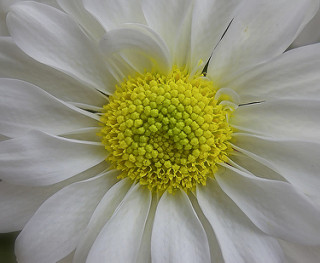

In [10]:
daisy = list(data_dir.glob('daisy/*'))
PIL.Image.open(daisy[0])

In [11]:
flowers_dict = {
    'roses' : list(data_dir.glob('roses/*')),
    'daisy' : list(data_dir.glob('daisy/*')),
    'dandelion' : list(data_dir.glob('dandelion/*')),
    'tulips' : list(data_dir.glob('tulips/*')),
    'sunflowers' : list(data_dir.glob('sunflowers/*')),
}
flowers_lables = {
    'roses' : 0,
    'daisy' : 1,
    'dandelion' : 2,
    'tulips' : 3,
    'sunflowers' : 4
}

In [12]:
flowers_dict['roses'][0]
#converting it into str
str(flowers_dict['roses'][0])

'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [13]:
#now converting the image into numpy array
img = cv2.imread(str(flowers_dict['roses'][0]))
img.shape

(240, 179, 3)

In [14]:
#each image have different shapes... converting them into a standard one
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [15]:
X,Y = [], []
for flower_name,images in flowers_dict.items():
     print(f'{flower_name} : {len(images)}')

roses : 641
daisy : 633
dandelion : 898
tulips : 799
sunflowers : 699


In [16]:
for flower_name,images in flowers_dict.items():
    for image in images:
        img= cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        Y.append(flowers_lables[flower_name])

In [17]:
X = np.array(X)
Y = np.array(Y)

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state = 0)

print(len(X_train),len(X_test))

2752 918


In [19]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [20]:
X_train_scaled[0]

array([[[0.26666667, 0.30980392, 0.30196078],
        [0.24705882, 0.2745098 , 0.24705882],
        [0.23529412, 0.24313725, 0.21960784],
        ...,
        [0.19215686, 0.15686275, 0.14509804],
        [0.18823529, 0.15294118, 0.14117647],
        [0.18823529, 0.15294118, 0.14117647]],

       [[0.22352941, 0.24313725, 0.23529412],
        [0.23921569, 0.25098039, 0.23529412],
        [0.23529412, 0.23921569, 0.21568627],
        ...,
        [0.18823529, 0.15294118, 0.14117647],
        [0.18823529, 0.15294118, 0.14117647],
        [0.19607843, 0.16078431, 0.14901961]],

       [[0.23921569, 0.22745098, 0.22352941],
        [0.25098039, 0.25098039, 0.23137255],
        [0.23137255, 0.23137255, 0.20784314],
        ...,
        [0.19215686, 0.15686275, 0.14509804],
        [0.19215686, 0.15686275, 0.14509804],
        [0.19607843, 0.16078431, 0.14901961]],

       ...,

       [[0.19215686, 0.4745098 , 0.36470588],
        [0.15686275, 0.25490196, 0.2       ],
        [0.20392157, 0

In [22]:
num_classes = 5

model = keras.Sequential([
    keras.layers.Conv2D(16,3,padding='same',activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32,3,padding='same',activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64,3,padding='same',activation='relu'),
    keras.layers.MaxPooling2D(),

    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(num_classes)
])

model.compile(
    optimizer= 'adam',
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics = ['accuracy']
)

model.fit(X_train_scaled,Y_train,epochs=30)

Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 13s 131ms/step - accuracy: 0.3938 - loss: 1.3515
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 11s 128ms/step - accuracy: 0.6074 - loss: 0.9694
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 11s 127ms/step - accuracy: 0.7150 - loss: 0.7634
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 11s 127ms/step - accuracy: 0.8126 - loss: 0.5646
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 11s 127ms/step - accuracy: 0.8784 - loss: 0.3422
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 11s 128ms/step - accuracy: 0.9241 - loss: 0.2154
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 11s 127ms/step - accuracy: 0.9609 - loss: 0.1391
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 11s 127ms/step - accuracy: 0.9918 - loss: 0.0498
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 11s 127ms/step - accuracy: 0.9771 - loss: 0.0821
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 11s 128ms/step - accuracy: 0.9980 - loss: 0.0207
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 11s 128ms/step - accuracy: 0.9972 - loss: 0.0142
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 11

In [24]:
model.evaluate(X_test_scaled,Y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.6378 - loss: 2.4559


[2.3463966846466064, 0.6612200140953064]

In [26]:
predictions = model.predict(X_test_scaled)
predictions

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step


array([[  3.1332803 ,  16.66482   ,   2.3784082 ,  -4.529399  ,
         -8.631698  ],
       [ 11.226325  ,   0.07934534, -17.322302  ,   5.089062  ,
          1.8714464 ],
       [ -5.4534726 ,   0.2982812 ,  16.260927  , -11.026543  ,
        -11.655836  ],
       ...,
       [ -2.2729354 , -17.564964  ,   0.47046462,  12.667742  ,
         -0.2844427 ],
       [  1.7146838 ,   5.4694247 ,  -1.9386816 ,  -2.7537394 ,
          1.4081168 ],
       [ 15.667278  , -11.2114105 , -15.973071  ,  21.246021  ,
         -3.2958305 ]], dtype=float32)

In [41]:
score = tf.nn.softmax(predictions[1])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([9.9774337e-01, 1.4386238e-05, 3.9857324e-13, 2.1559538e-03,
       8.6346896e-05], dtype=float32)>

In [42]:
np.argmax(score)

0

In [40]:
Y_test[1]

0

In [47]:
img_height = 180
img_width = 180

data_augmentation = keras.Sequential([
    keras.layers.RandomFlip("horizontal",input_shape=(img_height,img_width,3)),
    keras.layers.RandomRotation(0.2),
    keras.layers.RandomZoom(0.3)
])

C:\Users\sivam\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
num_classes = 5

model = keras.Sequential([
    data_augmentation,
    keras.layers.Conv2D(16,3,padding='same',activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32,3,padding='same',activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64,3,padding='same',activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Dropout(0.2),

    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(num_classes)
])

model.compile(
    optimizer= 'adam',
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics = ['accuracy']
)

model.fit(X_train_scaled,Y_train,epochs=30)

Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 14s 146ms/step - accuracy: 0.3422 - loss: 1.5218
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 12s 144ms/step - accuracy: 0.4998 - loss: 1.1984
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 12s 144ms/step - accuracy: 0.5878 - loss: 1.0292
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 13s 147ms/step - accuracy: 0.6256 - loss: 0.9544
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 12s 145ms/step - accuracy: 0.6416 - loss: 0.8991
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 12s 144ms/step - accuracy: 0.6657 - loss: 0.8542
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 12s 144ms/step - accuracy: 0.6927 - loss: 0.8248
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 13s 145ms/step - accuracy: 0.6849 - loss: 0.7825
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 12s 145ms/step - accuracy: 0.6927 - loss: 0.8029
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 12s 145ms/step - accuracy: 0.6931 - loss: 0.7819
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 13s 145ms/step - accuracy: 0.6823 - loss: 0.7972
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 13

In [50]:
model.evaluate(X_train_scaled,Y_train)

86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.8394 - loss: 0.4215


[0.436781644821167, 0.8339389562606812]

In [53]:
prediction = model.predict(X_test_scaled)
prediction

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step


array([[-1.0391402 ,  9.916187  ,  1.2449539 ,  0.47283658, -1.0289365 ],
       [ 4.2911015 , -0.87459815, -2.6867306 ,  3.2361085 , -1.3750665 ],
       [ 1.4460347 ,  2.129128  ,  6.0990176 ,  1.5247477 , -5.3570814 ],
       ...,
       [ 2.2447107 , -1.6361092 , -1.6598537 ,  7.00191   ,  1.2893263 ],
       [ 3.304921  ,  0.4967855 ,  0.44875032,  1.8141321 , -1.986442  ],
       [ 7.7442617 ,  2.0979214 , -4.4550066 , 10.045362  , -3.3918526 ]],
      dtype=float32)

In [55]:
score = tf.nn.softmax(prediction[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([1.7459724e-05, 9.9971431e-01, 1.7139857e-04, 7.9191908e-05,
       1.7638802e-05], dtype=float32)>

In [56]:
np.argmax(score)

1

In [57]:
Y_test[0]

1